# **Unsupervised Learning Practice: Unsupervised Learning of Visual Features by Contrasting Cluster Assignments**

This notebook implements and test the [SwAV](https://arxiv.org/pdf/2006.09882.pdf) approach (Swapping Assignments between multiple Views of the same image). The method simultaneously clusters the data while enforcing consistency between cluster assignments produced for different augmentations (or “views”) of the same image, instead of comparing features directly as in contrastive learning. The authors use a “swapped” prediction mechanism to predict the code of a view from the representation of another view. In addition, they also propose a new data augmentation strategy, multi-crop. 

The notebook workflow consists of:
1. Define a ResNet50 as the backbone network
2. Train SwAV and save the weights
3. Fine-tune the networks with 5% of the labeled samples using a Linear Classifier at the bottom:
  *  Baseline Network --> ResNet50 pre-trained with ImageNet
  *  SwAV Network --> ResNet50 pre-trained with ImageNet + SwAV

Authors: Dario Augusto Borges, Daliana Lobo Torres, Laura Elena Cue\
Source code in Pytorch: https://github.com/facebookresearch/swav \
Source code in TensorFlow: https://github.com/ayulockin/SwAV-TF


---

## **Method**

"In SwAV, we first obtain “codes” by assigning features to prototype vectors. We then solve a “swapped” prediction problem wherein the codes obtained from one data augmented view are predicted using the other view. Thus, SwAV does not directly compare image features. Prototype vectors are learned along with the ConvNet parameters by backpropragation".

<figure>
<center>
<img src='https://i.ibb.co/TtSW4Fd/figure-3.png' width="600"/> 
<figcaption align = "center"> Figure 1: High-level overview of SwAV. Source: <a href="https://arxiv.org/pdf/2006.09882.pdf">SwAV.
</center>
</figure>


---

## **Dataset** 
"The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class."


[Read more.](https://www.cs.toronto.edu/~kriz/cifar.html)

<table>
    <tr>
        <td class="cifar-class-name">airplane</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="https://www.cs.toronto.edu/~kriz/cifar-class-name">automobile</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">bird</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">cat</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/cat10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">deer</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/deer10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">dog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">frog</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/frog10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">horse</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/horse10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">ship</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship10.png" class="cifar-sample" /></td>
    </tr>
    <tr>
        <td class="cifar-class-name">truck</td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck1.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck2.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck3.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck4.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck5.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck6.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck7.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck8.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck9.png" class="cifar-sample" /></td>
        <td><img src="https://www.cs.toronto.edu/~kriz/cifar-10-sample/truck10.png" class="cifar-sample" /></td>
    </tr>
</table>




---
## **Code**

### Import

In [ ]:
#@title Imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras import models

import matplotlib.pyplot as plt
import numpy as np
import random
import time
import os
import random
from tqdm import trange

from itertools import groupby
from tqdm import tqdm

tf.random.set_seed(666)
np.random.seed(666)

tfds.disable_progress_bar()
print(tf.__version__)

2.9.2


### Multi-Crop Augmentation Policy

<figure>
<center>
<img src='https://i.ibb.co/RBGqZmk/figure-4.png' width="600"/>
<figcaption align = "center"> Figure 2: Multi-crop: the image is transformed into V+ 2 views: two global views and V small resolution zoomed views. Source: <a href="https://arxiv.org/pdf/2006.09882.pdf"> SwAV.
</center>
</figure>

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

def random_apply(func, x, p):
	return tf.cond(
		tf.less(tf.random.uniform([], minval=0, maxval=1, dtype=tf.float32),tf.cast(p, tf.float32)),
            lambda: func(x),lambda: x)
 
def gaussian_blur(image, kernel_size=23, padding='SAME'):
  sigma = tf.random.uniform((1,))* 1.9 + 0.1

  radius = tf.cast(kernel_size / 2, tf.int32)
  kernel_size = radius * 2 + 1
  x = tf.cast(tf.range(-radius, radius + 1), tf.float32)
  blur_filter = tf.exp(
    -tf.pow(x, 2.0) / (2.0 * tf.pow(tf.cast(sigma, tf.float32), 2.0)))
  blur_filter /= tf.reduce_sum(blur_filter)
  # One vertical and one horizontal filter.
  blur_v = tf.reshape(blur_filter, [kernel_size, 1, 1, 1])
  blur_h = tf.reshape(blur_filter, [1, kernel_size, 1, 1])
  num_channels = tf.shape(image)[-1]
  blur_h = tf.tile(blur_h, [1, 1, num_channels, 1])
  blur_v = tf.tile(blur_v, [1, 1, num_channels, 1])
  expand_batch_dim = image.shape.ndims == 3
  if expand_batch_dim:
    image = tf.expand_dims(image, axis=0)
  blurred = tf.nn.depthwise_conv2d(
    image, blur_h, strides=[1, 1, 1, 1], padding=padding)
  blurred = tf.nn.depthwise_conv2d(
    blurred, blur_v, strides=[1, 1, 1, 1], padding=padding)
  if expand_batch_dim:
    blurred = tf.squeeze(blurred, axis=0)
  return blurred

def color_jitter(x, s=0.5):
	x = tf.image.random_brightness(x, max_delta=0.8*s)
	x = tf.image.random_contrast(x, lower=1-0.8*s, upper=1+0.8*s)
	x = tf.image.random_saturation(x, lower=1-0.8*s, upper=1+0.8*s)
	x = tf.image.random_hue(x, max_delta=0.2*s)
	x = tf.clip_by_value(x, 0, 1)
	return x

def color_drop(x):
	x = tf.image.rgb_to_grayscale(x)
	x = tf.tile(x, [1, 1, 3])
	return x

def custom_augment(image):
	# Random flips
	image = random_apply(tf.image.flip_left_right, image, p=0.5)
	# Randomly apply gausian blur
	image = random_apply(gaussian_blur, image, p=0.5)
	# Randomly apply transformation (color distortions) with probability p.
	image = random_apply(color_jitter, image, p=0.8)
	# Randomly apply grayscale
	image = random_apply(color_drop, image, p=0.2)

	return image

def random_resize_crop(image, min_scale, max_scale, crop_size):
	# Conditional resizing
  if crop_size == 32:
    image_shape = 37
    image = tf.image.resize(image, (image_shape, image_shape))
  else:
    image_shape = 16
    image = tf.image.resize(image, (image_shape, image_shape))
    
  # Get the crop size for given min and max scale
  size = tf.random.uniform(shape=(1,), minval=min_scale*image_shape,
    maxval=max_scale*image_shape, dtype=tf.float32)
  size = tf.cast(size, tf.int32)[0]
  # Get the crop from the image
  crop = tf.image.random_crop(image, (size,size,3))
  crop_resize = tf.image.resize(crop, (crop_size, crop_size))
  return crop_resize

@tf.function
def scale_image(image):
	image = tf.image.convert_image_dtype(image, tf.float32)
	return image

@tf.function
def tie_together(image, min_scale, max_scale, crop_size):
	# Retrieve the image features
	image = image['image']
	# Scale the pixel values
	image = scale_image(image)
	# Random resized crops
	image = random_resize_crop(image, min_scale,max_scale, crop_size)
	# Color distortions & Gaussian blur
	image = custom_augment(image)

	return image


In [ ]:
def get_multires_dataset(dataset,
	size_crops,
	num_crops,
	min_scale,
	max_scale,
	options=None):
	loaders = tuple()
	for i, num_crop in enumerate(num_crops):
		for _ in range(num_crop):
			loader = (dataset.shuffle(1024).map(lambda x: tie_together(x, min_scale[i],
                                                             max_scale[i], size_crops[i]), num_parallel_calls=AUTO))
			if options!=None:
				loader = loader.with_options(options)
			loaders += (loader, )

	return loaders

def shuffle_zipped_output(a,b,c,d,e):
	listify = [a,b,c,d,e]
	random.shuffle(listify)

	return listify[0], listify[1], listify[2], listify[3], listify[4]


In [ ]:
#@title Define parameters for Multi-Crop Data Augmentation
# Set Configs and experimental options for tf.data.Dataset
# Configs
BS = 32
SIZE_CROPS = [32, 16]         # [high res, low res]
NUM_CROPS = [2, 3]            # [# high res, # low res]

# Experimental options
MIN_SCALE = [0.5, 0.14] 
MAX_SCALE = [1., 0.5]
options = tf.data.Options()
options.experimental_optimization.noop_elimination = True             # eliminate no-op transformations
tf.compat.v1.data.experimental.OptimizationOptions.map_vectorization = True    # vectorize map transformations
options.experimental_optimization.apply_default_optimizations = True  # apply default graph optimizations
options.experimental_deterministic = False                            # disable deterministic order
options.experimental_threading.max_intra_op_parallelism = 1           # overrides the maximum degree of intra-op parallelism

In [ ]:
#@title Gather 5% of Cifar10 dataset
train_ds, _ = tfds.load("cifar10", split=["train[:5%]", "train[95%:]"])
print(train_ds)

<PrefetchDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


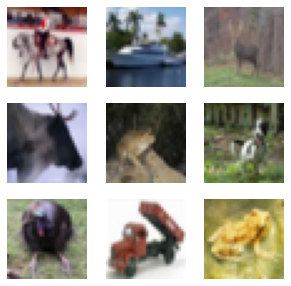

In [ ]:
#@title Visualization
plt.figure(figsize=(5, 5))
for i, image  in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image['image'])
    plt.axis("off")

In [ ]:
# Get multiple data loaders
trainloaders = get_multires_dataset(train_ds,size_crops=SIZE_CROPS,
                                    num_crops=NUM_CROPS,min_scale=MIN_SCALE,
                                    max_scale=MAX_SCALE,options=options)

In [ ]:
#Prepare the final data loader
# Zipping 
trainloaders_zipped = tf.data.Dataset.zip(trainloaders)

# Final trainloader
trainloaders_zipped = (trainloaders_zipped.batch(BS).prefetch(AUTO))
print(trainloaders_zipped)
# Image shape of different views
im1, im2, im3, im4, im5 = next(iter(trainloaders_zipped))
print(im1.shape, im2.shape, im3.shape, im4.shape, im5.shape)

(32, 32, 32, 3) (32, 32, 32, 3) (32, 16, 16, 3) (32, 16, 16, 3) (32, 16, 16, 3)


### Model Architecture

<figure>
<center>
<img src='https://i.ibb.co/7nXZpJB/figure-9.png' width="600"/> 
<figcaption align = "center"> Figure 3: Backbone ResNet50 and projection_prototype model. Source: <a href="https://wandb.ai/authors/swav-tf/reports/Unsupervised-Visual-Representation-Learning-with-SwAV--VmlldzoyMjg3Mzg">SwAV blog.
</center>
</figure>

In [ ]:
def get_resnet_backbone():
  base_model = tf.keras.applications.ResNet50(include_top=False,
                                              weights='imagenet')
  base_model = models.Model(base_model.input, base_model.get_layer('conv3_block4_out').output)

  #base_model.summary()
  base_model.trainable = True

  inputs = layers.Input((None, None, 3))
  h = base_model(inputs, training=True)
  h = layers.GlobalAveragePooling2D()(h)
  backbone = models.Model(inputs, h)
  return backbone

def get_projection_prototype(dense_1=1024, dense_2=96, prototype_dimension=15):
	inputs = layers.Input((512, ))
	projection_1 = layers.Dense(dense_1)(inputs)
	projection_1 = layers.BatchNormalization()(projection_1)
	projection_1 = layers.Activation("relu")(projection_1)

	projection_2 = layers.Dense(dense_2)(projection_1)
	projection_2_normalize = tf.math.l2_normalize(projection_2, axis=1, name='projection')

	prototype = layers.Dense(prototype_dimension, use_bias=False, name='prototype')(projection_2_normalize)

	return models.Model(inputs=inputs,outputs=[projection_2_normalize, prototype])


feature_backbone = get_resnet_backbone()
feature_backbone.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 model (Functional)          (None, None, None, 512)   1460096   
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 1,460,096
Trainable params: 1,449,984
Non-trainable params: 10,112
_________________________________________________________________


In [ ]:
projection_prototype = get_projection_prototype(256, 128, 15)
projection_prototype.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 tf.math.l2_normalize (TFOpL  (None, 128)              0         
 ambda)                                                    

### Sinkhorn Knopp for Cluster Assignment

<figure>
<center>
<img src='https://i.ibb.co/bWRjrWS/figure-10.png' width="600"/> 
<figcaption align = "center"> Figure 4: Cluster assignment. Source: <a href="https://wandb.ai/authors/swav-tf/reports/Unsupervised-Visual-Representation-Learning-with-SwAV--VmlldzoyMjg3Mzg">SwAV blog.
</center>
</figure>

Codes are computed using only the image features within a batch to make the method online. A problem to solve is the cluster assignment: assign B samples $[z1 , . . . , zB ]$ to $K$ (prototype) clusters $[ c1 , . . . , cK ]$. So we have to map $B$ samples to $K$ prototypes: let $Q$ be the matrix representing this mapping.

The cost matrix $Q = –C^TZ$, where each entry of this matrix is the dot product between a sample and a prototype and roughly represents the cost we are going to pay when we assign a sample to a prototype.

In [ ]:
def sinkhorn(sample_prototype_batch):
    Q = tf.transpose(tf.exp(sample_prototype_batch/0.05))
    Q /= tf.keras.backend.sum(Q)
    K, B = Q.shape

    u = tf.zeros_like(K, dtype=tf.float32)
    r = tf.ones_like(K, dtype=tf.float32) / K
    c = tf.ones_like(B, dtype=tf.float32) / B

    for _ in range(3):
        u = tf.keras.backend.sum(Q, axis=1)
        Q *= tf.expand_dims((r / u), axis=1)
        Q *= tf.expand_dims(c / tf.keras.backend.sum(Q, axis=0), 0)

    final_quantity = Q / tf.keras.backend.sum(Q, axis=0, keepdims=True)
    final_quantity = tf.transpose(final_quantity)

    return final_quantity

### Train Function

In [ ]:
# @tf.function
# Reference: https://github.com/facebookresearch/swav/blob/master/main_swav.py
def train_step(input_views, feature_backbone, projection_prototype, 
               optimizer, crops_for_assign, temperature):
    # ============ retrieve input data ... ============
    im1, im2, im3, im4, im5  = input_views 
    inputs = [im1, im2, im3, im4, im5]
    batch_size = inputs[0].shape[0]

    # ============ create crop entries with same shape ... ============
    #A vector of indices to reorder as views with similar resolutions
    crop_sizes = [inp.shape[1] for inp in inputs] # list of crop size of views
    unique_consecutive_count = [len([elem for elem in g]) for _, g in groupby(crop_sizes)] # equivalent to torch.unique_consecutive
    #(unique_consecutive_count)
    idx_crops = tf.cumsum(unique_consecutive_count)
    #print(idx_crops)
    
    # ============ multi-res forward passes ... ============
    # tf.stop_gradient have been placed carefully in order to exclude the computations from dependency tracing.
    # This is useful any time you want to compute a value with TensorFlow but need to pretend that the value 
    #was a constant. 
    start_idx = 0
    with tf.GradientTape() as tape:
        for end_idx in idx_crops:
            concat_input = tf.stop_gradient(tf.concat(inputs[start_idx:end_idx], axis=0))
            _embedding = feature_backbone(concat_input) # get embedding of same dim views together
            if start_idx == 0:
                embeddings = _embedding # for first iter
            else:
                embeddings = tf.concat((embeddings, _embedding), axis=0) # concat all the embeddings from all the views
            start_idx = end_idx
        
        projection, prototype = projection_prototype(embeddings) # get normalized projection and prototype
        
        projection = tf.stop_gradient(projection)

        # ============ swav loss ... ============
        # https://github.com/facebookresearch/swav/issues/19
        loss = 0
        for i, crop_id in enumerate(crops_for_assign): # crops_for_assign = [0,1] hold that we use to create these codes the views in these positions.
            with tape.stop_recording():   # there to ensure the computations for cluster assignments do not get traced for gradient updates
                out = prototype[batch_size * crop_id: batch_size * (crop_id + 1)]
                
                # get assignments
                q = sinkhorn(out) # sinkhorn is used for cluster assignment
            
            # cluster assignment prediction
            subloss = 0
            for v in np.delete(np.arange(np.sum(NUM_CROPS)), crop_id): # (for rest of the portions compute p and take cross entropy with q)
                p = tf.nn.softmax(prototype[batch_size * v: batch_size * (v + 1)] / temperature) 
                subloss -= tf.math.reduce_mean(tf.math.reduce_sum(q * tf.math.log(p), axis=1))
            loss += subloss / tf.cast((tf.reduce_sum(NUM_CROPS) - 1), tf.float32)
        
        loss /= len(crops_for_assign)

    # ============ backprop ... ============
    variables = feature_backbone.trainable_variables + projection_prototype.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

### Training Loop

In [ ]:
def train_swav(feature_backbone, 
               projection_prototype, 
               dataloader, 
               optimizer, 
               crops_for_assign,
               temperature, 
               epochs=50):
  
    step_wise_loss = []
    epoch_wise_loss = []
    
    for epoch in range(epochs):
        # normalize the prototypes
        w = projection_prototype.get_layer('prototype').get_weights()
        w = tf.transpose(w)
        w = tf.math.l2_normalize(w, axis=1)
        projection_prototype.get_layer('prototype').set_weights(tf.transpose(w))

        iter_data = iter(trainloaders_zipped)

        t = trange(len(dataloader), position=0, leave=True)
        for i in  t:
            inputs = next(iter_data)
            loss = train_step(inputs, feature_backbone, projection_prototype, 
                              optimizer, crops_for_assign, temperature)
            step_wise_loss.append(loss)
            t.set_postfix(loss='{:05.3f}'.format(loss))
            
        epoch_wise_loss.append(np.mean(step_wise_loss))

        print("epoch: {} loss: {:.3f}".format(epoch + 1, np.mean(step_wise_loss)))

    return epoch_wise_loss, [feature_backbone, projection_prototype]

In [ ]:
# ============ re-initialize the networks and the optimizer ... ============
feature_backbone = get_resnet_backbone()
projection_prototype = get_projection_prototype(15)

decay_steps = 1000
lr_decayed_fn = tf.keras.experimental.CosineDecay(
    initial_learning_rate=0.1, decay_steps=decay_steps)
opt = tf.keras.optimizers.SGD(learning_rate=lr_decayed_fn)

# ======================= train  ===========================
epoch_wise_loss, models_tr = train_swav(feature_backbone, 
                                    projection_prototype, 
                                    trainloaders_zipped, 
                                    opt,
                                    crops_for_assign=[0, 1],
                                    temperature=0.1, 
                                    epochs=5)

100%|██████████| 79/79 [00:27<00:00,  2.93it/s, loss=2.711]


epoch: 1 loss: 2.724


100%|██████████| 79/79 [00:17<00:00,  4.58it/s, loss=2.710]


epoch: 2 loss: 2.717


100%|██████████| 79/79 [00:15<00:00,  5.02it/s, loss=2.709]


epoch: 3 loss: 2.714


100%|██████████| 79/79 [00:15<00:00,  5.10it/s, loss=2.709]


epoch: 4 loss: 2.713


100%|██████████| 79/79 [00:15<00:00,  5.12it/s, loss=2.709]

epoch: 5 loss: 2.712


In [ ]:
# ======================= get weights  ===========================
feature_backbone_weights = feature_backbone.get_weights()

### Fine Tune

In [ ]:
#@title Gather Cifar10 dataset, 5% for training and 95% for test
train_ft, validation_ft = tfds.load("cifar10",
                                    split=["train[10:15%]", "train[95%:]"],
                                    as_supervised=True)

In [ ]:
#@title Define linear classfier
def get_linear_classifier(swav=False):
    # input placeholder
    inputs = layers.Input(shape=(32, 32, 3))
    # get swav baseline model architecture
    feature_backbone = get_resnet_backbone()
    # load trained weights
    if swav:
      # set swav weights
      feature_backbone.set_weights(feature_backbone_weights)
      
    feature_backbone.trainable = False

    x = feature_backbone(inputs, training=False)
    outputs = layers.Dense(10, activation="softmax")(x)
    linear_model = models.Model(inputs, outputs)

    return linear_model



In [ ]:
# Define Dataloader for Baseline Model
BATCH_SIZE=128
def scale_resize_image(image, label):
  image = tf.keras.applications.resnet.preprocess_input(image)
  image = tf.image.resize(image, (32, 32)) 
  return (image, label)


training_ds = (
    train_ft
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

testing_ds = (
    validation_ft
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
#@title Early Stopping to prevent overfitting
early_stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=35, verbose=2, restore_best_weights=True)

In [ ]:
#@title Baseline Model --> ResNet50 pre-trained with ImageNet
model_pre = get_linear_classifier()
model_pre.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_7 (Functional)        (None, 512)               1460096   
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,465,226
Trainable params: 5,130
Non-trainable params: 1,460,096
_________________________________________________________________


In [ ]:
#@title Training baseline linear classfier
model_pre.compile(loss="sparse_categorical_crossentropy", metrics=["acc"],
                     optimizer='adam')

history = model_pre.fit(training_ds,
                 validation_data=(testing_ds),
                 epochs=35,
                 callbacks=[early_stopper])

Epoch 1/35
20/20 [==============================] - 3s 83ms/step - loss: 2.6877 - acc: 0.1196 - val_loss: 2.4068 - val_acc: 0.1524
Epoch 2/35
20/20 [==============================] - 1s 34ms/step - loss: 2.2480 - acc: 0.1948 - val_loss: 2.1198 - val_acc: 0.2284
Epoch 3/35
20/20 [==============================] - 1s 34ms/step - loss: 2.0301 - acc: 0.2688 - val_loss: 1.9575 - val_acc: 0.2924
Epoch 4/35
20/20 [==============================] - 1s 35ms/step - loss: 1.8886 - acc: 0.3304 - val_loss: 1.8547 - val_acc: 0.3244
Epoch 5/35
20/20 [==============================] - 1s 35ms/step - loss: 1.7904 - acc: 0.3632 - val_loss: 1.7822 - val_acc: 0.3552
Epoch 6/35
20/20 [==============================] - 1s 35ms/step - loss: 1.7176 - acc: 0.3872 - val_loss: 1.7283 - val_acc: 0.3724
Epoch 7/35
20/20 [==============================] - 1s 34ms/step - loss: 1.6607 - acc: 0.4096 - val_loss: 1.6871 - val_acc: 0.3868
Epoch 8/35
20/20 [==============================] - 1s 35ms/step - loss: 1.6146 - a

In [ ]:
#@title Define Dataloader for SwAV Model
BATCH_SIZE=128
def scale_resize_image(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, (32, 32)) # Resizing to highest resolution used while training swav
  return (image, label)


training_ds = (
    train_ft
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

testing_ds = (
    validation_ft
    .map(scale_resize_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
#@title Model --> ResNet50 pre-trained with ImageNet + SwAV
model_swav = get_linear_classifier(swav=True)
model_swav.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 model_10 (Functional)       (None, 512)               1460096   
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,465,226
Trainable params: 5,130
Non-trainable params: 1,460,096
_________________________________________________________________


In [ ]:
#@title Training SwAV linear classfier
model_swav.compile(loss="sparse_categorical_crossentropy", metrics=["acc"],
                     optimizer='adam')

history_swav = model_swav.fit(training_ds,
                 validation_data=(testing_ds),
                 epochs=35,
                 callbacks=[early_stopper])

Epoch 1/35
20/20 [==============================] - 2s 54ms/step - loss: 2.5811 - acc: 0.0988 - val_loss: 2.3270 - val_acc: 0.1484
Epoch 2/35
20/20 [==============================] - 1s 26ms/step - loss: 2.2094 - acc: 0.1840 - val_loss: 2.0592 - val_acc: 0.2692
Epoch 3/35
20/20 [==============================] - 1s 25ms/step - loss: 1.9995 - acc: 0.2796 - val_loss: 1.8956 - val_acc: 0.3352
Epoch 4/35
20/20 [==============================] - 0s 25ms/step - loss: 1.8551 - acc: 0.3336 - val_loss: 1.7793 - val_acc: 0.3932
Epoch 5/35
20/20 [==============================] - 1s 31ms/step - loss: 1.7486 - acc: 0.3820 - val_loss: 1.6914 - val_acc: 0.4324
Epoch 6/35
20/20 [==============================] - 1s 26ms/step - loss: 1.6667 - acc: 0.4212 - val_loss: 1.6242 - val_acc: 0.4604
Epoch 7/35
20/20 [==============================] - 1s 31ms/step - loss: 1.6017 - acc: 0.4488 - val_loss: 1.5713 - val_acc: 0.4820
Epoch 8/35
20/20 [==============================] - 1s 27ms/step - loss: 1.5488 - a

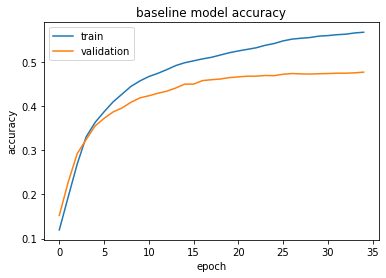

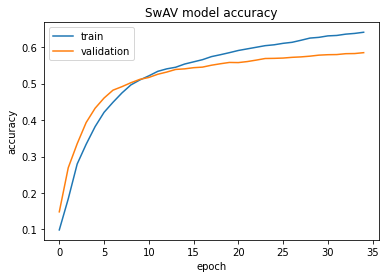

In [ ]:
#@title Plot accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('baseline model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_swav.history['acc'])
plt.plot(history_swav.history['val_acc'])
plt.title('SwAV model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

---
# Class exercise

Change the views' resolution and the number of views, and compare the results

Fill your accuracy results and the parameters in the next google docs spreadsheet: